# Comparação dos resultados do IDEB de Escolas Municipais localizadas em áreas com diferentes indicadores de segurança pública no Município do Rio de Janeiro - RJ 

Neste trabalho final da disciplina de Seminários de estatística, cursada em 2024.1, apresentamos essa análise, nestes notebooks temos o trabalho completo que está resumido no cartaz apresentado na Escola Nacional de Ciências Estatísticas (https://ence.ibge.gov.br/)

## Motivação 

A responsabilidade pela disponibilização de educação infantil e do ensino fundamental é dos municípios, conforme preconiza a Constituição Federal em seu artigo 211.  

Na cidade do Rio de janeiro, muitas escolas estão situadas em áreas com problemas de segurança pública.  

Em ano de eleições municipais, pareceu-nos importante identificar se há relação da localização das escolas, se próximas ou não a áreas conflagradas, com os resultados obtidos com o IDEB (Índice de Desenvolvimento da Educação Básica). 

## Objetivo 

Identificar se há relação da localização das escolas, se próximas ou não a áreas conflagradas, com os resultados obtidos com o IDEB (Índice de Desenvolvimento da Educação Básica), no município do Rio de Janeiro-RJ. 

## População alvo 

IDEB de escolas localizadas no Município do Rio de Janeiro obtido através da aplicação do SAEB (Sistema de Avaliação da Educação Básica) em 2021. 

### Grupo:
Anna Maria Scofano (202410091-03) <br>
Bernardo Monteiro Rocha (202410221-26) <br> 
Viviane Bastos de Oliveira Moura (202411001-00) <br> 
Fernando Chahine Barros (202410631-59)

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statistics
import math

In [14]:
df_escolas_municipais = pd.read_excel('dados/Escolas_Municipais.xlsx', index_col=0)
df_escolas_municipais.head()

,Y,objectid,designacao,nome_escola,endereco,bairro,cre,cod_atividade,globalid,cod_microarea
X,,,,,,,,,,
-43.252938,-22.993559,16229,227004,Escola Municipal Rinaldo De Lamare,"Avenida Niemeyer, 776",Rocinha,2,1,{52C57AB8-972A-4DAF-B3A9-8B8B689C98F0},2.10
-43.222709,-22.979395,16230,206024,Escola Municipal Sergio Vieira de Mello,"Rua Adalberto Ferreira, 19",Leblon,2,1,{0BC0B627-149C-4EF2-ACE3-7C0B3780AC91},2.5
-43.181053,-22.934001,16231,204021,Escola Municipal Senador Corrêa,Rua Esteves Junior Nº 42,Laranjeiras,2,1,{3ADF744E-9D00-4905-BFB9-9BDF29CAC69D},2.1
-43.188093,-22.903783,16232,102004,Escola Municipal Rivadavia Corrêa,"Av. Pres. Vargas, 1.314",Centro,1,1,{1410326F-9585-42C0-BCD6-DA28D3601A10},1.6
-43.233936,-22.892220,16233,107501,Escola Municipal Edmundo Bittencourt,"Rua Lopes Trovão, 287",Benfica,1,1,{EF28E061-20D6-4CBC-AC2C-E920E4E305EE},1.2


In [15]:
df_RJ_IDEB_anos_finais_escolas_municipais = pd.read_excel('dados/RJ_IDEB_anos_finais_escolas_2021.xlsx', index_col=0)
df_RJ_IDEB_anos_finais_escolas_municipais.head()

,Designação,Nome da Escola,Média - 6º a 9º ano,Taxa de Aprovação - 2021 - 6º,Taxa de Aprovação - 2021 - 7º,Taxa de Aprovação - 2021 - 8º,Taxa de Aprovação - 2021 - 9º,Indicador de Rendimento (P),Nota SAEB - 2021 - Matemática,Nota SAEB - 2021 - Língua Portuguesa,Nota SAEB - 2021 - Nota Média Padronizada (N),IDEB 2021 (N x P)
Código da Escola,,,,,,,,,,,,
33062420,101004.0,ESCOLA MUNICIPAL BENJAMIM CONSTANT,99.7,100,100,98.9,100,0.997227,249.35,246.05,4.923333,4.9
33062439,101003.0,ESCOLA MUNICIPAL DARCY VARGAS,-,-,-,-,-,-,-,-,-,-
33062471,101007.0,ESCOLA MUNICIPAL MARECHAL MASCARENHAS DE MORAE...,97.2,94.4,99.2,95.2,100,0.971391,243.47,248.07,4.859,4.7
33062498,101009.0,ESCOLA MUNICIPAL PROFESSOR WALTER CARLOS DE MA...,100,100,100,100,100,1,245.08,253.6,4.978,5
33062501,101001.0,ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,97.8,-,98.9,95.2,98.9,0.976351,249.05,254.99,5.067333,4.9


In [16]:
df_RJ_IDEB_anos_iniciais_escolas_2021 = pd.read_excel('dados/RJ_IDEB_anos_iniciais_escolas_2021.xlsx', index_col=0)
df_RJ_IDEB_anos_iniciais_escolas_2021.head()

,Designação,Nome da Escola,Taxa de Aprovação - 2021 - 1º ao 5º ano,Taxa de Aprovação - 2021 - 1º,Taxa de Aprovação - 2021 - 2º,Taxa de Aprovação - 2021 - 3º,Taxa de Aprovação - 2021 - 4º,Taxa de Aprovação - 2021 - 5º,Indicador de Rendimento (P),Nota SAEB - 2021 - Matemática,Nota SAEB - 2021 - Língua Portuguesa,Nota Média Padronizada (N),IDEB 2021 (N x P)
Código da Escola,,,,,,,,,,,,,
33062358,101501.0,CIEP HENFIL,100,100,100,100,100,100,1,188.42,175.26,4.7464,4.7
33062420,101004.0,ESCOLA MUNICIPAL BENJAMIM CONSTANT,98.6,98.3,96.6,100,100,100,0.989611,ND,ND,-,-
33062439,101003.0,ESCOLA MUNICIPAL DARCY VARGAS,98.5,97.8,98.2,98.3,100,98.6,0.985743,ND,ND,-,-
33062447,101006.0,ESCOLA MUNICIPAL FRANCISCO BENJAMIM GALLOTI,100,100,100,100,100,100,1,201.56,187.99,5.228618,5.2
33062455,101005.0,ESCOLA MUNICIPAL GENERAL MITRE,99.7,98.3,100,100,100,100,0.996553,199.85,184.37,5.130166,5.1


                                              geometry
0    POLYGON ((-42.18687 -22.55548, -42.18733 -22.5...
1    MULTIPOLYGON (((-41.90082 -22.78264, -41.90079...
2    POLYGON ((-42.52555 -22.16087, -42.50060 -22.1...
3    POLYGON ((-43.34665 -22.00375, -43.34603 -22.0...
4    MULTIPOLYGON (((-41.97224 -22.14280, -41.97201...
..                                                 ...
132  MULTIPOLYGON (((-43.11375 -22.86460, -43.11358...
133  MULTIPOLYGON (((-42.98891 -22.89112, -42.98870...
134  POLYGON ((-43.16851 -22.91435, -43.16854 -22.9...
135  MULTIPOLYGON (((-43.17829 -22.89257, -43.17950...
136  MULTIPOLYGON (((-43.17170 -22.77666, -43.17170...

[137 rows x 1 columns]


<Axes: >

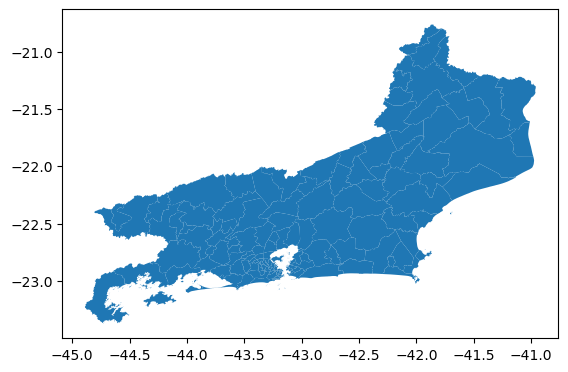

In [36]:
import geopandas as gpd, fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw'

shapefile = gpd.read_file("dados/lm_dp_2019.shx")
print(shapefile);
shapefile.plot()

In [32]:
from shapely.geometry import Point, Polygon
fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [34]:
my_map = gpd.read_file('dados/doc.kml', driver='KML');
my_map

,Name,Description,geometry
0,120,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-42.18687 -22.55548 0.00000,..."
1,127,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-41.90082 -22.78264 0.00000,..."
2,151,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-42.52555 -22.16087 0.00000,..."
3,107,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-43.34665 -22.00375 0.00000,..."
4,123,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-41.97224 -22.14280 0.00000,..."
...,...,...,...
132,76,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-43.11375 -22.86460 0.00000,..."
133,81,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-42.98891 -22.89112 0.00000,..."
134,9,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-43.16851 -22.91435 0.00000,..."
135,1,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-43.17829 -22.89257 0.00000,..."
